In [11]:
import pandas as pd
import matplotlib.pyplot as plt

import os

import seaborn as sns
%matplotlib inline

In [33]:
resultpath = os.path.join('results', 'corr')
imgpath = os.path.join('img', 'corr')

if not os.path.isdir(imgpath):
    os.makedirs(imgpath)
    

data = pd.read_csv(os.path.join(resultpath, 'result4w.txt'), sep=' ', index_col=0)
print 'Cases computed:', str(len(data))

Cases computed: 80


In [34]:
data.head()

,A,V,P,E_backup_full,E_backup_repr,E_loss_stor_full,E_loss_stor_repr,E_curt_full,E_curt_repr,E_sol_full,E_sol_repr,t_repr
0,20000.0,50000.0,3600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.790924
1,20000.0,50000.0,3850000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.317431
2,20000.0,50000.0,4100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.344932
3,20000.0,50000.0,4350000.0,NaN,2.192300e+07,NaN,691488.962068,NaN,0.0,NaN,2.410191e+06,6.514319
4,20000.0,50000.0,4600000.0,2.185454e+07,2.191270e+07,686104.097017,681724.584956,0.0,0.0,2.454607e+06,2.410191e+06,5.781417


There are no occurences where the representative periods lead to a feasible solution and the full year representation does not

In [35]:
data[(~data['E_backup_repr'].isnull() & data['E_backup_full'].isnull())]

,A,V,P,E_backup_full,E_backup_repr,E_loss_stor_full,E_loss_stor_repr,E_curt_full,E_curt_repr,E_sol_full,E_sol_repr,t_repr
3,20000.0,50000.0,4350000.0,NaN,2.192300e+07,NaN,691488.962068,NaN,0.0,NaN,2.410191e+06,6.514319
21,20000.0,75000.0,3850000.0,NaN,2.217694e+07,NaN,932069.574245,NaN,0.0,NaN,2.410191e+06,6.582273


There are two cases where the representative periods lead to an infeasible solution and the full year is feasible

In [36]:
data[(data['E_backup_repr'].isnull() & ~data['E_backup_full'].isnull())]

,A,V,P,E_backup_full,E_backup_repr,E_loss_stor_full,E_loss_stor_repr,E_curt_full,E_curt_repr,E_sol_full,E_sol_repr,t_repr


Cases where both are infeasible

In [37]:
print 'Infeasible solutions:', str(len(data[(data['E_backup_repr'].isnull() & data['E_backup_full'].isnull())]))
data[(data['E_backup_repr'].isnull() & data['E_backup_full'].isnull())]

Infeasible solutions: 16


,A,V,P,E_backup_full,E_backup_repr,E_loss_stor_full,E_loss_stor_repr,E_curt_full,E_curt_repr,E_sol_full,E_sol_repr,t_repr
0,20000.0,50000.0,3600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.790924
1,20000.0,50000.0,3850000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.317431
2,20000.0,50000.0,4100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.344932
5,40000.0,50000.0,3600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.585020
6,40000.0,50000.0,3850000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.356255
7,40000.0,50000.0,4100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.366860
10,60000.0,50000.0,3600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.606965
11,60000.0,50000.0,3850000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.317601
12,60000.0,50000.0,4100000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.463795
15,80000.0,50000.0,3600000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.565822


In [38]:
data = data.dropna()
data

,A,V,P,E_backup_full,E_backup_repr,E_loss_stor_full,E_loss_stor_repr,E_curt_full,E_curt_repr,E_sol_full,E_sol_repr,t_repr
4,20000.0,50000.0,4600000.0,2.185454e+07,2.191270e+07,6.861041e+05,6.817246e+05,0.000000e+00,0.000000e+00,2.454607e+06,2.410191e+06,5.781417
8,40000.0,50000.0,4350000.0,1.930244e+07,1.940085e+07,7.162156e+05,7.122014e+05,0.000000e+00,0.000000e+00,4.909215e+06,4.820382e+06,6.541849
9,40000.0,50000.0,4600000.0,1.929285e+07,1.939022e+07,7.071105e+05,7.021227e+05,0.000000e+00,0.000000e+00,4.909215e+06,4.820382e+06,5.836999
13,60000.0,50000.0,4350000.0,1.781114e+07,1.706010e+07,7.186080e+05,7.331888e+05,1.035479e+06,1.715807e+05,6.328343e+06,7.058993e+06,6.681792
14,60000.0,50000.0,4600000.0,1.780273e+07,1.704961e+07,7.106258e+05,7.232285e+05,1.035480e+06,1.716061e+05,6.328343e+06,7.058967e+06,5.803392
18,80000.0,50000.0,4350000.0,1.692061e+07,1.686997e+07,7.142975e+05,7.334229e+05,2.648398e+06,2.401411e+06,7.170032e+06,7.239354e+06,6.674429
19,80000.0,50000.0,4600000.0,1.691263e+07,1.642387e+07,7.067136e+05,7.250660e+05,2.648398e+06,1.987131e+06,7.170032e+06,7.653634e+06,5.829244
22,20000.0,75000.0,4100000.0,2.208876e+07,2.215170e+07,9.086136e+05,9.081553e+05,0.000000e+00,0.000000e+00,2.454607e+06,2.410191e+06,5.811012
23,20000.0,75000.0,4350000.0,2.207651e+07,2.213225e+07,8.969807e+05,8.897304e+05,0.000000e+00,0.000000e+00,2.454607e+06,2.410191e+06,5.875389
24,20000.0,75000.0,4600000.0,2.206592e+07,2.212324e+07,8.869129e+05,8.811916e+05,0.000000e+00,0.000000e+00,2.454607e+06,2.410191e+06,5.940414


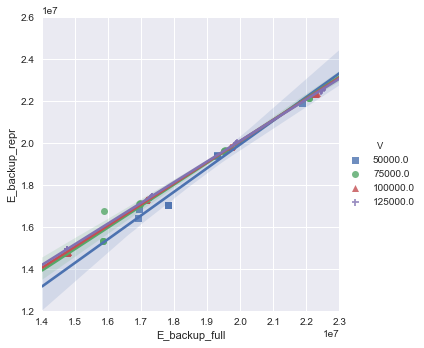

In [39]:
resultname = 'backup'
fullname = 'E_{}_full'.format(resultname)
reprname = 'E_{}_repr'.format(resultname)
sns.lmplot(fullname, reprname, data, hue='V', markers=['s', 'o', '^', '+'])

In [40]:
import numpy as np

sns.set_context("notebook")

import matplotlib.patches as mpatches



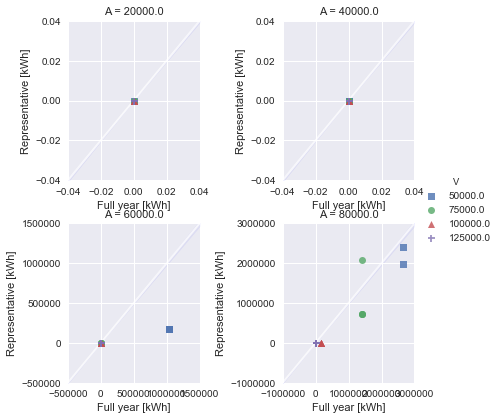

In [43]:
resultname = 'curt'
fullname = 'E_{}_full'.format(resultname)
reprname = 'E_{}_repr'.format(resultname)

dataname_no_ext = 'result5w'

g = sns.lmplot(x=fullname, y=reprname, data=data, fit_reg=False, hue='V', col='A', col_wrap=2, size=3,
               markers=['s', 'o', '^', '+'], sharex=False, sharey=False, legend=False)
acc = 0.025

for axnum, ax in enumerate(g.axes):
    limmin = np.min([ax.get_xlim(), ax.get_ylim()])
    limmax = np.max([ax.get_xlim(), ax.get_ylim()])
    
    ax.set_xlim(limmin, limmax)
    ax.set_ylim(limmin, limmax)
    
    ax.set_xlabel('Full year [kWh]')
    ax.set_ylabel('Representative [kWh]')
    
    #
    # now plot both limits against eachother
    g.axes[axnum].plot([limmin, limmax], [limmin, limmax], 'w-',linewidth=2, alpha=0.75, zorder=0)
    g.axes[axnum].fill_between([limmin, limmax], [(1-acc)*limmin, (1-acc)*limmax], [(1+acc)*limmin, (1+acc)*limmax], zorder=-1, alpha=0.05, color='b', label='$\pm$'+str(100*acc)+'%')
    
g.add_legend()
#g.axes[-1].legend(loc='lower right', title='Volume')
plt.savefig(os.path.join(imgpath,'E_{}_{}.png'.format(dataname_no_ext, resultname)), dpi=100)

In [21]:
for ax in g.axes:
    ax.plot([1.4e7, 2.3e7],[1.4e7, 2.3e7], linestyle=':',linewidth=0.5)

In [22]:
g.

SyntaxError: invalid syntax (<ipython-input-22-c901b5827816>, line 1)

In [ ]:
for ax in g.axes:
    ax.plot([1.4e7, 2.3e7],[1.4e7, 2.3e7], linestyle=':',linewidth=0.5, ax=ax)

In [65]:
data_split = pd.melt(data, id_vars=['A', 'P', 'V'], value_vars=['Representative', 'Full year'],
                    var_name='Optimization', value_name='Energy')
data_split

,A,P,V,Optimization,Energy
0,20000.0,4600000.0,50000.0,Representative,2.208824e+07
1,40000.0,4600000.0,50000.0,Representative,1.968946e+07
2,60000.0,4600000.0,50000.0,Representative,1.813814e+07
3,80000.0,4600000.0,50000.0,Representative,1.752686e+07
4,20000.0,4100000.0,75000.0,Representative,2.233528e+07
5,20000.0,4350000.0,75000.0,Representative,2.231649e+07
6,20000.0,4600000.0,75000.0,Representative,2.229975e+07
7,40000.0,4100000.0,75000.0,Representative,1.992478e+07
8,40000.0,4350000.0,75000.0,Representative,1.991050e+07
9,40000.0,4600000.0,75000.0,Representative,1.989815e+07


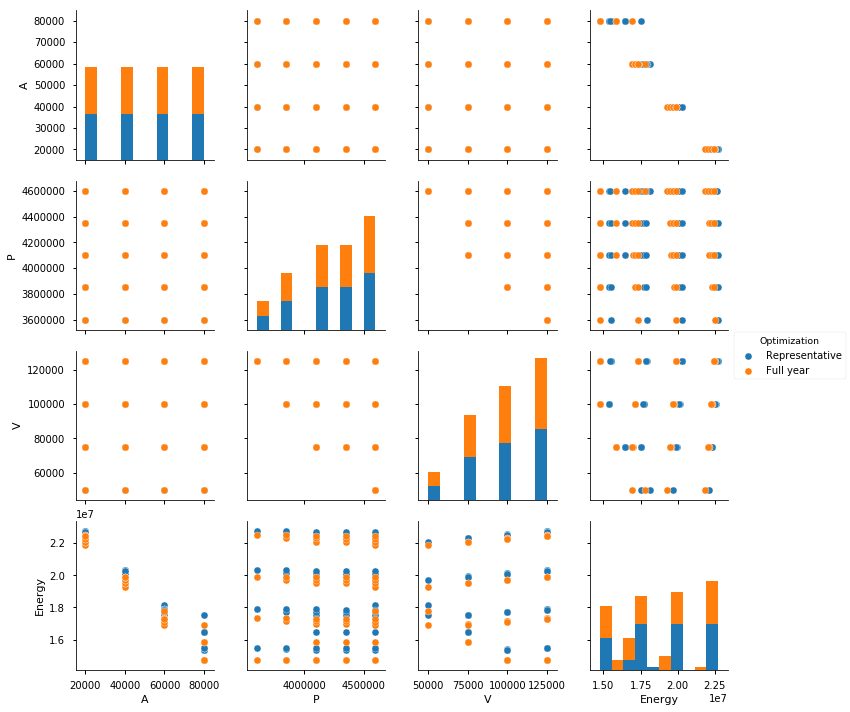

In [66]:
sns.pairplot(data_split, hue='Optimization')

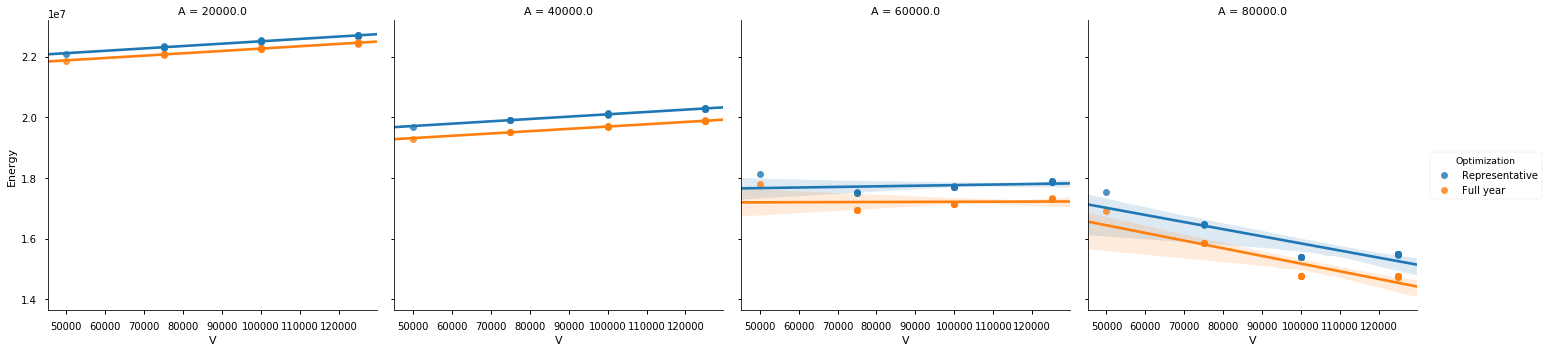

In [68]:
sns.lmplot(x='V', y='Energy', data=data_split, col='A', hue='Optimization')